# Importing Libraries

In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils

# Loading Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print(X_train[0])   #it print image in array form

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
X_train.shape 

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
X_train.shape[0]


50000

In [10]:
len(X_train)

50000

In [11]:
len(y_train)

50000

In [12]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
y_train[0]

array([6], dtype=uint8)

# Visualising image

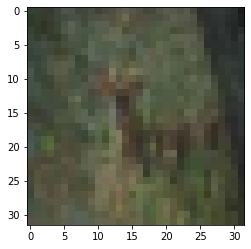

In [14]:

img = X_train[10] 
plt.imshow(img)
plt.show()

# Data Preprocessing

In [15]:
# X_train=X_train.reshape(len(X_train),32,32,3)

X_train=X_train.astype('float32')
#It is most common to use 32-bit precision when training a neural network, so at one point the training 
#data will have to be converted to 32 bit floats.Since the dataset fits easily in RAM, we might as well convert to float immediately.

# X_test=X_test.reshape(len(X_test),32,32,3)
X_test=X_test.astype('float32')

X_train=X_train/255
X_test=X_test/255


In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:

n_classes=10
print("Before one hot encoding : ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
#

Before one hot encoding :  (50000, 1)


In [18]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
print("After one hot encoding : ",y_train.shape)
print("After one hot encoding : ",y_test.shape)

After one hot encoding :  (50000, 10)
After one hot encoding :  (10000, 10)


# Building CNN model

In [18]:
cnn=tf.keras.models.Sequential()

# Convlutional layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=30,input_shape=[32,32,3],kernel_size=3,activation='relu'))

# Max pooling layer

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

# Convlutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=40,kernel_size=3,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

In [23]:
cnn.add(tf.keras.layers.Flatten())

# full connection layer

In [24]:
cnn.add(tf.keras.layers.Dense(activation='relu',units=65))

In [25]:
cnn.add(tf.keras.layers.Dense(activation='softmax',units=10))

# Compiling CNN

In [26]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn.fit(X_train,y_train,epochs=3,validation_data=(X_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4104 - accuracy: 0.4933 - val_loss: 1.3280 - val_accuracy: 0.5339
Epoch 2/3
1563/1563 [==============================] - 107s 68ms/step - loss: 1.0328 - accuracy: 0.6398 - val_loss: 1.0089 - val_accuracy: 0.6536
Epoch 3/3
1563/1563 [==============================] - 112s 71ms/step - loss: 0.8910 - accuracy: 0.6902 - val_loss: 0.9686 - val_accuracy: 0.6674


# Predicting values

In [40]:
classe=range(10)
labels=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','sheep','truck']
classlabels=dict(zip(classe,labels))
print(classlabels)


{0: 'aeroplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'sheep', 9: 'truck'}


1/1 [==============================] - 0s 17ms/step
[[1.2705812e-03 3.2595859e-03 4.5567136e-03 9.0225675e-04 7.4604941e-05
  3.8444487e-04 3.7981806e-07 6.7137919e-02 2.1782047e-04 9.2219573e-01]]
truck


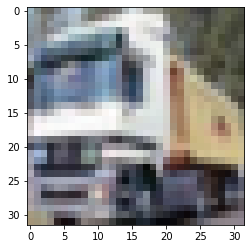

In [42]:
import numpy as np

plt.imshow(X_train[1])
img=np.expand_dims(X_train[1],0)# converted into 1-D array.
x=cnn.predict(img)
print(x)
x=np.argmax(x)
print(classlabels[x])
